In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data = pd.read_json("https://pomber.github.io/covid19/timeseries.json")

In [3]:
#taking a look at the structure of data for a specefic country
data["US"].head()

0    {'date': '2020-1-22', 'confirmed': 1, 'deaths'...
1    {'date': '2020-1-23', 'confirmed': 1, 'deaths'...
2    {'date': '2020-1-24', 'confirmed': 2, 'deaths'...
3    {'date': '2020-1-25', 'confirmed': 2, 'deaths'...
4    {'date': '2020-1-26', 'confirmed': 5, 'deaths'...
Name: US, dtype: object

In [4]:
#the objective is to create a table of countries and dates as columns with confirmed cases as values
data_to_use = pd.DataFrame()

In [5]:
#creating a dates column

#making a list of countries
countries = data.columns

dates = []
for x,y in zip(range(0,len(data)),countries):
    date_extracted = data[y][x]["date"]
    dates.append(date_extracted)
data_to_use["date"]=dates

In [6]:

#adding ccountries as columns
for i in countries:
    data_to_use[i] = 0
    data_to_use[i] = data_to_use[i].astype(float)

In [7]:
#updating values of cells to confirmed cases
for country in countries:
    for x in range(0,len(data)):
        data_to_use.at[x,country] = data[country][x]["confirmed"]
    

In [8]:
#previewing results
for i in countries:
    data_to_use[i].astype(float)
data_to_use.tail(20)

,date,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,Kosovo,Burma,MS Zaandam,Botswana,Burundi,Sierra Leone,Malawi,South Sudan,Western Sahara,Sao Tome and Principe
56,2020-3-18,22.0,59.0,74.0,39.0,0.0,1.0,79.0,84.0,568.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
57,2020-3-19,22.0,64.0,87.0,53.0,0.0,1.0,97.0,115.0,681.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
58,2020-3-20,24.0,70.0,90.0,75.0,1.0,1.0,128.0,136.0,791.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59,2020-3-21,24.0,76.0,139.0,88.0,2.0,1.0,158.0,160.0,1071.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60,2020-3-22,40.0,89.0,201.0,113.0,2.0,1.0,266.0,194.0,1549.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
61,2020-3-23,40.0,104.0,230.0,133.0,3.0,3.0,301.0,235.0,1682.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
62,2020-3-24,74.0,123.0,264.0,164.0,3.0,3.0,387.0,249.0,2044.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
63,2020-3-25,84.0,146.0,302.0,188.0,3.0,3.0,387.0,265.0,2364.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64,2020-3-26,94.0,174.0,367.0,224.0,4.0,7.0,502.0,290.0,2810.0,...,71.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
65,2020-3-27,110.0,186.0,409.0,267.0,4.0,7.0,589.0,329.0,3143.0,...,86.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
cases_data_to_use_t = data_to_use.set_index(data_to_use["date"])
cases_data_to_use_t = data_to_use.transpose(copy = True)
cases_data_to_use_t.reset_index()
cases_data_to_use_t.to_csv("cases_data_to_use_t.csv", index_label = False)

In [10]:
#creating a new cases df
new_cases_to_use = data_to_use.copy()

#updating values to new cases
for country in countries:
    for x in range(1,len(data)):
        if data_to_use[country][x-1] != 0:
            new_cases_to_use.at[x,country] = data_to_use[country][x] - data_to_use[country][x-1]
        else: 
            new_cases_to_use.at[x,country] = data_to_use[country][x]
new_cases_to_use["Japan"]

0       2.0
1       0.0
2       0.0
3       0.0
4       2.0
      ...  
71    317.0
72    122.0
73    522.0
74      0.0
75    515.0
Name: Japan, Length: 76, dtype: float64

In [11]:
#creating a growth factor df
growth_data_to_use = new_cases_to_use.copy()

In [12]:
#updating values to growth factor
for country in countries:
    for x in range(1,len(data)):
        if new_cases_to_use[country][x-1] != 0:
            growth_data_to_use.at[x,country] = new_cases_to_use[country][x] / new_cases_to_use[country][x-1]
        else: 
            growth_data_to_use.at[x,country] = new_cases_to_use[country][x]

In [13]:
growth_data_to_use["Bahrain"].tail(10)

66     1.250000
67     2.300000
68     0.695652
69     3.250000
70     0.038462
71    37.000000
72     0.391892
73     0.551724
74     0.750000
75     4.666667
Name: Bahrain, dtype: float64

In [14]:
growth_data_to_use

,date,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,Kosovo,Burma,MS Zaandam,Botswana,Burundi,Sierra Leone,Malawi,South Sudan,Western Sahara,Sao Tome and Principe
0,2020-1-22,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-1-23,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-1-24,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-1-25,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-1-26,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,4.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,2020-4-2,0.571429,1.125000,1.061069,2.714286,0.0,2.0,79.000000,2.358974,0.838284,...,0.000000,5.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0
72,2020-4-3,0.222222,1.500000,1.330935,0.289474,0.0,3.0,1.670886,0.793478,0.842520,...,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73,2020-4-4,2.250000,1.074074,0.432432,2.454545,2.0,0.0,1.409091,0.465753,1.028037,...,9.000000,1.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0
74,2020-4-5,2.777778,0.965517,0.862500,1.296296,2.0,0.0,0.000000,1.529412,0.622727,...,1.111111,0.0,0.0,2.0,0.0,1.0,0.0,1.0,4.0,0.0


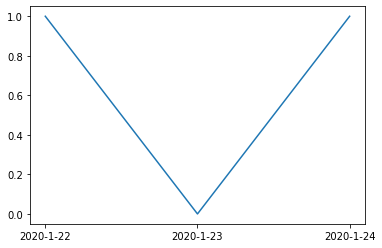

In [15]:
#plotting the data to preview
plt.plot(growth_data_to_use["date"][:3], growth_data_to_use["US"][:3] )

In [16]:
#saving growth as json
growth_data_to_use.to_json("growth.json")
#saving growth as csv
growth_data_to_use.to_csv("growth.csv")

In [17]:
#creating a decision tree for a tabel with an analysis of each country's infection rate
up_country = []
growth_factor = []
cases = []
analysis = []
avg_growth_factor_past_2_days = []
new_cases = []
for country in countries:

        
        if data_to_use[country][len(data)-10] == 0:
            up_country.append(country)
            growth_factor.append(growth_data_to_use[country][len(data)-1])
            cases.append(data_to_use[country][len(data)-1])
            avg_growth_factor_past_2_days.append((growth_data_to_use[country][len(data)-1]+growth_data_to_use[country][len(data)-2])/2)
            new_cases.append(new_cases_to_use[country][len(data)-1])
            analysis.append("New to The Pandemic") 
        elif data_to_use[country][len(data)-1] < 229 and growth_data_to_use[country][len(data)-1] <= 2 or (new_cases_to_use[country][len(data)-7] ==0 and new_cases_to_use[country][len(data)-3] ==0 and new_cases_to_use[country][len(data)-1] == 0):
            up_country.append(country)
            growth_factor.append(growth_data_to_use[country][len(data)-1])
            cases.append(data_to_use[country][len(data)-1])
            avg_growth_factor_past_2_days.append((growth_data_to_use[country][len(data)-1]+growth_data_to_use[country][len(data)-2])/2)
            new_cases.append(new_cases_to_use[country][len(data)-1])
            analysis.append("COVID-19 Spread Can Be Contained!")
        elif data_to_use[country][len(data)-1] < 2000 and ((growth_data_to_use[country][len(data)-1]+growth_data_to_use[country][len(data)-2])/2) <1:
            up_country.append(country)
            growth_factor.append(growth_data_to_use[country][len(data)-1])
            cases.append(data_to_use[country][len(data)-1])
            avg_growth_factor_past_2_days.append((growth_data_to_use[country][len(data)-1]+growth_data_to_use[country][len(data)-2])/2)
            new_cases.append(new_cases_to_use[country][len(data)-1])
            analysis.append("COVID-19 Spread is Possibly Getting Under Control!")
        elif data_to_use[country][len(data)-1] < 2000 and (growth_data_to_use[country][len(data)-1]+growth_data_to_use[country][len(data)-2])/2 <1.6:
            up_country.append(country)
            growth_factor.append(growth_data_to_use[country][len(data)-1])
            cases.append(data_to_use[country][len(data)-1])
            avg_growth_factor_past_2_days.append((growth_data_to_use[country][len(data)-1]+growth_data_to_use[country][len(data)-2])/2)
            new_cases.append(new_cases_to_use[country][len(data)-1])
            analysis.append("COVID-19 Spread is Starting To Get Outta Hands!")
        elif data_to_use[country][len(data)-1] < 3000 and ((growth_data_to_use[country][len(data)-1]+growth_data_to_use[country][len(data)-2])/2) <1:
            up_country.append(country)
            growth_factor.append(growth_data_to_use[country][len(data)-1])
            cases.append(data_to_use[country][len(data)-1])
            avg_growth_factor_past_2_days.append((growth_data_to_use[country][len(data)-1]+growth_data_to_use[country][len(data)-2])/2)
            new_cases.append(new_cases_to_use[country][len(data)-1])
            analysis.append("COVID-19 Spread is Possibly Getting Under Control!")
        elif data_to_use[country][len(data)-1] < 3000 and (growth_data_to_use[country][len(data)-1]+growth_data_to_use[country][len(data)-2])/2 <1.6:
            up_country.append(country)
            growth_factor.append(growth_data_to_use[country][len(data)-1])
            cases.append(data_to_use[country][len(data)-1])
            avg_growth_factor_past_2_days.append((growth_data_to_use[country][len(data)-1]+growth_data_to_use[country][len(data)-2])/2)
            new_cases.append(new_cases_to_use[country][len(data)-1])
            analysis.append("COVID-19 Spread is Starting To Get Outta Hands!")
        elif data_to_use[country][len(data)-1] > 3000 and ((growth_data_to_use[country][len(data)-1]+growth_data_to_use[country][len(data)-2])/2 <1 and new_cases_to_use[country][len(data)-1] <229):
            up_country.append(country)
            growth_factor.append(growth_data_to_use[country][len(data)-1])
            cases.append(data_to_use[country][len(data)-1])
            avg_growth_factor_past_2_days.append((growth_data_to_use[country][len(data)-1]+growth_data_to_use[country][len(data)-2])/2)
            new_cases.append(new_cases_to_use[country][len(data)-1])
            analysis.append("COVID-19 Spread is Possibly Getting Under Control!")
        elif (data_to_use[country][len(data)-1] > 3000 and ((growth_data_to_use[country][len(data)-1] >1) or new_cases_to_use[country][len(data)-1] >229)) or (new_cases_to_use[country][len(data)-30] >0 and growth_data_to_use[country][len(data)-1]>1.5):
            up_country.append(country)
            growth_factor.append(growth_data_to_use[country][len(data)-1])
            cases.append(data_to_use[country][len(data)-1])
            avg_growth_factor_past_2_days.append((growth_data_to_use[country][len(data)-1]+growth_data_to_use[country][len(data)-2])/2)
            new_cases.append(new_cases_to_use[country][len(data)-1])
            analysis.append("COVID-19 Spread Has Gotten Out of Control!")
        else:
            up_country.append(country)
            growth_factor.append(growth_data_to_use[country][len(data)-1])
            cases.append(data_to_use[country][len(data)-1])
            avg_growth_factor_past_2_days.append((growth_data_to_use[country][len(data)-1]+growth_data_to_use[country][len(data)-2])/2)
            new_cases.append(new_cases_to_use[country][len(data)-1])
            analysis.append("Analysis is Pending Additional Data")



      
    
growth_chart_df = pd.DataFrame()
growth_chart_df["country"] = up_country
growth_chart_df["growth_factor"]= growth_factor
growth_chart_df["cases"]= cases
growth_chart_df["analysis"]= analysis
growth_chart_df["growth_factor_mod"]= avg_growth_factor_past_2_days
growth_chart_df["new_cases"] = new_cases


In [18]:
#checking the output snapshot, reviewing if the analysis falls in correctly and no rows are missed
growth_chart_df.sort_values(by = "cases")

,country,growth_factor,cases,analysis,growth_factor_mod,new_cases
181,South Sudan,0.000000,1.0,New to The Pandemic,0.500000,0.0
166,Timor-Leste,0.000000,1.0,COVID-19 Spread Can Be Contained!,0.000000,0.0
116,Papua New Guinea,1.000000,2.0,COVID-19 Spread Can Be Contained!,0.500000,1.0
178,Burundi,0.000000,3.0,New to The Pandemic,0.000000,0.0
183,Sao Tome and Principe,4.000000,4.0,New to The Pandemic,2.000000,4.0
...,...,...,...,...,...,...
56,France,1.774359,98963.0,COVID-19 Spread Has Gotten Out of Control!,0.944206,5190.0
60,Germany,0.806500,103374.0,COVID-19 Spread Has Gotten Out of Control!,0.811825,3251.0
77,Italy,0.833874,132547.0,COVID-19 Spread Has Gotten Out of Control!,0.866052,3599.0
138,Spain,0.918036,136675.0,COVID-19 Spread Has Gotten Out of Control!,0.852044,5029.0


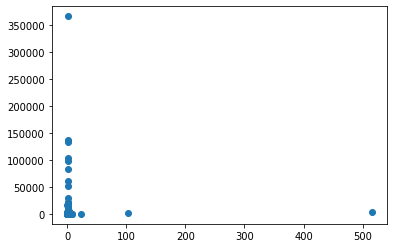

In [19]:
plt.scatter(growth_chart_df["growth_factor"],growth_chart_df["cases"])

In [20]:
growth_chart_df.to_csv("growth_category.csv")